In [1]:
###Import
import sys

#import geobayes_simple as gs
from matplotlib import pyplot as plt
from IPython.core.display import Image

%matplotlib inline
import pymc as pm
from pymc.Matplot import plot
import numpy as np
from IPython.core.pylabtools import figsize
figsize(15, 6)
import seaborn
seaborn.set_context(font_scale=2)
seaborn.set_style("white")

from pymc import graph

import scipy.optimize as sop
import scipy.stats as stats
import matplotlib.mlab as mlab

In [2]:
fault_block = np.load('block_faults.npy') #1=hanging wall; 0=footwall
lith_block = np.load('block_lith.npy')
non_res = np.load('Non_res.npy')
res = np.load('res.npy')
#res = np.load('res.npy').astype(int)
seal = np.load('seal.npy')
res2 = np.load('sec_res.npy')

In [3]:
resres = np.vstack({tuple(row) for row in res})
print(resres)

[[ 36.          47.          19.91866888]
 [ 30.          49.          21.65040868]
 [  4.          12.          25.26278234]
 ..., 
 [ 10.18610644   2.          20.        ]
 [  2.           6.          24.57959283]
 [ 46.          31.          17.77826476]]


In [4]:
print(fault_block.reshape(50,50,50))

[[[ 1.  1.  1. ...,  1.  1.  1.]
  [ 1.  1.  1. ...,  1.  1.  1.]
  [ 1.  1.  1. ...,  1.  1.  1.]
  ..., 
  [ 1.  1.  1. ...,  1.  1.  1.]
  [ 1.  1.  1. ...,  1.  1.  1.]
  [ 1.  1.  1. ...,  1.  1.  1.]]

 [[ 1.  1.  1. ...,  1.  1.  1.]
  [ 1.  1.  1. ...,  1.  1.  1.]
  [ 1.  1.  1. ...,  1.  1.  1.]
  ..., 
  [ 1.  1.  1. ...,  1.  1.  1.]
  [ 1.  1.  1. ...,  1.  1.  1.]
  [ 1.  1.  1. ...,  1.  1.  1.]]

 [[ 1.  1.  1. ...,  1.  1.  1.]
  [ 1.  1.  1. ...,  1.  1.  1.]
  [ 1.  1.  1. ...,  1.  1.  1.]
  ..., 
  [ 1.  1.  1. ...,  1.  1.  1.]
  [ 1.  1.  1. ...,  1.  1.  1.]
  [ 1.  1.  1. ...,  1.  1.  1.]]

 ..., 
 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  

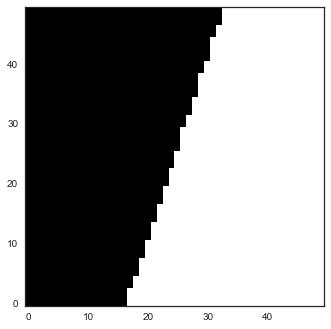

In [5]:
plt.imshow(fault_block.reshape(50,50,50)[:,25,:].T, origin='lower')

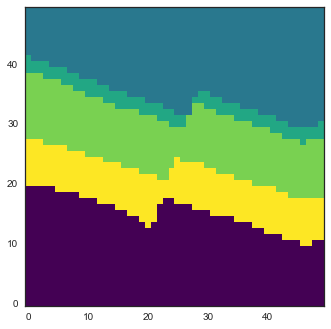

In [6]:
plt.imshow(lith_block.reshape(50,50,50)[:,25,:].T, origin='lower', cmap='viridis')

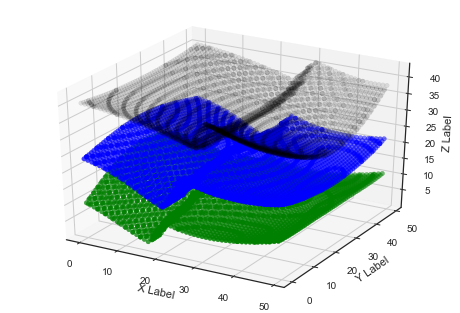

In [7]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

ax.scatter(res[:,0], res[:,1], res[:,2], c="b")
ax.scatter(seal[:,0], seal[:,1], seal[:,2], c='black', alpha=0.1)
ax.scatter(non_res[:,0], non_res[:,1], non_res[:,2], c='g')
#ax.scatter(maxmin[:,0], maxmin[:,1], maxmin[:,2], c='r', s = 100)
#what does marker=m do??

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [8]:
#fault_block_bool = fault_block.astype(bool)
#print(fault_block_bool)
#
#for i in lith_block:
#    if fault_block_bool[i] == False:
#        lith_block[i] = 10
#
#print(lith_block)

#print(fault_block.astype(bool))

#lith_block2 = (lith_block[fault_block.astype(bool)])
#print(lith_block2.shape)

lith_block[fault_block.astype(bool)] = 6
lith_block.shape
print(lith_block.reshape(50,50,50))

[[[ 6.  6.  6. ...,  6.  6.  6.]
  [ 6.  6.  6. ...,  6.  6.  6.]
  [ 6.  6.  6. ...,  6.  6.  6.]
  ..., 
  [ 6.  6.  6. ...,  6.  6.  6.]
  [ 6.  6.  6. ...,  6.  6.  6.]
  [ 6.  6.  6. ...,  6.  6.  6.]]

 [[ 6.  6.  6. ...,  6.  6.  6.]
  [ 6.  6.  6. ...,  6.  6.  6.]
  [ 6.  6.  6. ...,  6.  6.  6.]
  ..., 
  [ 6.  6.  6. ...,  6.  6.  6.]
  [ 6.  6.  6. ...,  6.  6.  6.]
  [ 6.  6.  6. ...,  6.  6.  6.]]

 [[ 6.  6.  6. ...,  6.  6.  6.]
  [ 6.  6.  6. ...,  6.  6.  6.]
  [ 6.  6.  6. ...,  6.  6.  6.]
  ..., 
  [ 6.  6.  6. ...,  6.  6.  6.]
  [ 6.  6.  6. ...,  6.  6.  6.]
  [ 6.  6.  6. ...,  6.  6.  6.]]

 ..., 
 [[ 0.  0.  0. ...,  2.  2.  2.]
  [ 0.  0.  0. ...,  2.  2.  2.]
  [ 0.  0.  0. ...,  2.  2.  2.]
  ..., 
  [ 0.  0.  0. ...,  2.  2.  2.]
  [ 0.  0.  0. ...,  2.  2.  2.]
  [ 0.  0.  0. ...,  2.  2.  2.]]

 [[ 0.  0.  0. ...,  2.  2.  2.]
  [ 0.  0.  0. ...,  2.  2.  2.]
  [ 0.  0.  0. ...,  2.  2.  2.]
  ..., 
  [ 0.  0.  0. ...,  2.  2.  2.]
  [ 0.  0.  0. ...,  

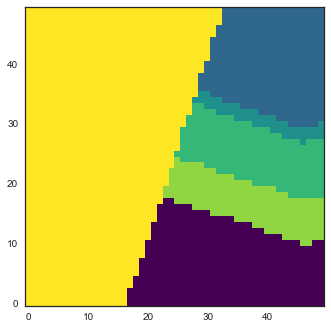

In [9]:
plt.imshow(lith_block.reshape(50,50,50)[:,25,:].T, origin='lower', cmap='viridis')

In [10]:
print(res)
print(res[:,2].shape)

x = res[:,0]
y = res[:,1]
z = res[:,2] 

g_min = np.argmin(z)
print(x[np.argmin(z)])
print(y[np.argmin(z)])

print(res[1616])


[[  0.           0.          23.78883875]
 [  1.           0.          23.53401037]
 [  1.           1.          23.75086374]
 ..., 
 [ 49.          47.          21.01704827]
 [ 49.          48.          21.34628804]
 [ 49.          49.          21.69764468]]
(3945,)
20.0
0.0
[ 20.           0.          13.78091711]


In [11]:
lith_block[fault_block.astype(bool)] = 6
lith_block2 = lith_block.reshape(50,50,50)
lith_block2[:,:,:min(z)] = 6
#hoz = lith_block2[:,:,min(z):]
#print(hoz)
#hoz.shape

C:\Users\Fabian\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  This is separate from the ipykernel package so we can avoid doing imports until


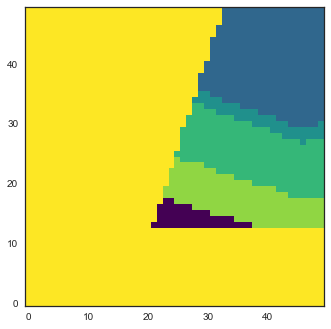

In [12]:
plt.imshow(lith_block2[:,25,:].T, origin='lower', cmap='viridis')

In [13]:
counter = 0
for i in lith_block:
    if lith_block[i] == 1:
        counter += 1
    
print(counter)

C:\Users\Fabian\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  This is separate from the ipykernel package so we can avoid doing imports until


0


In [14]:
print(res[:,2][fault_block.astype(bool)])

C:\Users\Fabian\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 3945 but corresponding boolean dimension is 125000
  """Entry point for launching an IPython kernel.


IndexError: index 3945 is out of bounds for axis 1 with size 3945

AttributeError: 'tuple' object has no attribute 'shape'

In [3]:
from scipy.signal import argrelextrema

x = np.array([5,4,3,4,5,7,8,7,8,9])

# for local maxima
argrelextrema(x, np.greater)

# for local minima
argrelextrema(x, np.less)

(array([2, 7]),)

In [117]:
mini = argrelextrema(res[:,2], np.less, order=10)

(array([   1,  129,  200,  276,  349,  421,  499,  580,  652,  739,  823,
         905,  990, 1076, 1163, 1256, 1342, 1436, 1528, 1616, 1702, 2239,
        2312, 2336, 2398, 2422, 2473, 2493, 2544, 2562, 2619, 2639, 2693,
        2713, 2766, 2785, 2840, 2859, 2904, 2924, 2971, 2990, 3039, 3058,
        3097, 3119, 3163, 3186, 3237, 3262, 3297, 3324, 3359, 3387, 3424,
        3455, 3480, 3517, 3530, 3587, 3654, 3717, 3779, 3843, 3911]),)

In [53]:
np.take(res[:,2], mini[0]).shape, res.shape

((65,), (3945, 3))

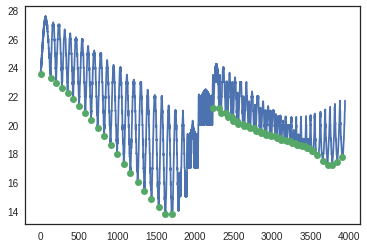

In [54]:
%matplotlib inline
plt.plot(res[:,2])
plt.plot( mini[0], np.take(res[:,2], mini[0]), 'o')

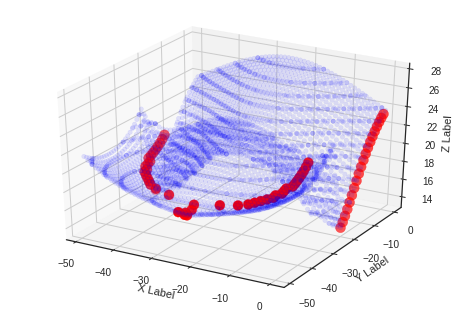

In [7]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt5
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

ax.scatter(-res[:,1], -res[:,0], res[:,2], c="b", alpha = 0.1)
#ax.scatter(seal[:,0], seal[:,1], seal[:,2], c='black')
#ax.scatter(-non_res[:,1], -non_res[:,0], non_res[:,2], c='g')
ax.scatter(-np.take(res[:,1], mini[0]), -np.take(res[:,0], mini[0]), np.take(res[:,2], mini[0]), c='r', s = 100)
#what does marker=m do??

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [168]:
#next: mask out points on irrelevant side of fault
minima = np.array(list(zip(np.take(res[:,1], mini[0]), np.take(res[:,0], mini[0]), np.take(res[:,2], mini[0]))))
fault_thresh = minima[:,1] > 15 #taking only relevant side by setting a threshold visually estimated, best: 20
min_corr_side = minima[fault_thresh]
min_corr_side

array([[  0.        ,  16.        ,  15.99795212],
       [  0.        ,  17.        ,  15.38339177],
       [  0.        ,  18.        ,  14.80037609],
       [  0.        ,  19.        ,  14.26538288],
       [  0.        ,  20.        ,  13.78091711],
       [ 49.        ,  20.        ,  13.78394308],
       [  6.        ,  25.        ,  21.16329786],
       [ 43.        ,  25.        ,  21.1641978 ],
       [  6.        ,  26.        ,  20.82863014],
       [ 43.        ,  26.        ,  20.82869869],
       [  6.        ,  27.        ,  20.54507598],
       [ 43.        ,  27.        ,  20.54585349],
       [  6.        ,  28.        ,  20.30345573],
       [ 43.        ,  28.        ,  20.30250097],
       [  6.        ,  29.        ,  20.09212614],
       [ 43.        ,  29.        ,  20.09228648],
       [  6.        ,  30.        ,  19.91038232],
       [ 43.        ,  30.        ,  19.90861878],
       [  6.        ,  31.        ,  19.74786452],
       [ 43.        ,  31.     

In [169]:

spill_pos = np.array(np.argmax(min_corr_side[:,2]))
#spill_pos2 = argrelextrema(min_corr_side[:,2], np.greater, order=10)
spill_point = np.take(min_corr_side[:,2], spill_pos)

spill_p = np.array([np.take(min_corr_side[:,1], spill_pos), np.take(min_corr_side[:,0], spill_pos), np.take(min_corr_side[:,2], spill_pos)])
#spill_p2 = np.take(min_corr_side[:,1], spill_pos2), np.take(min_corr_side[:,0], spill_pos2), np.take(min_corr_side[:,2], spill_pos2)
spill_p

array([ 25.       ,  43.       ,  21.1641978])

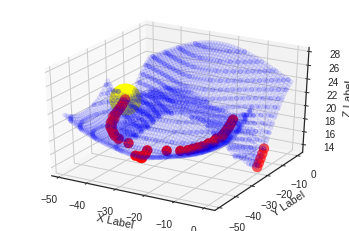

In [170]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

ax.scatter(-res[:,1], -res[:,0], res[:,2], c="b", alpha = 0.1)
#ax.scatter(seal[:,0], seal[:,1], seal[:,2], c='black')
#ax.scatter(-non_res[:,1], -non_res[:,0], non_res[:,2], c='g')
ax.scatter(-min_corr_side[:,0], -min_corr_side[:,1], min_corr_side[:,2], c='r', s = 100)
ax.scatter(-spill_p[1], -spill_p[0], spill_p[2], c='yellow', s = 1000)
#what does marker=m do??

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

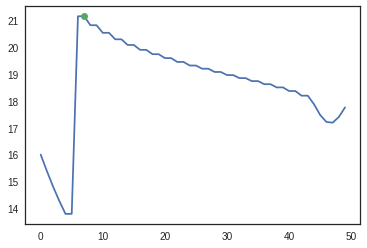

In [171]:
%matplotlib inline
plt.plot(min_corr_side[:,2])
plt.plot( spill_pos, np.take(min_corr_side[:,2],spill_pos), 'o')

In [173]:
spill_z = spill_p[2]
spill_z

21.164197799910983

In [ ]:
### bullshit code following
#clustering?

counter = 0

#to save z values in slices in
#yvals = [np.arange(0,50,1)]
#zvals = [np.arange(0,50,1)]
xvals = []
yvals = []
zvals = []
all_min = np.empty([3,], dtype=int)
print(all_min)

#array to save local mini in
#mins = []
#print(mins)

while counter < 50:
    for e in res:
        #print(e)
        if e[0] == counter:
            xvals.append(e[0])
            yvals.append(e[1])
            zvals.append(e[2])
          
    zvals = np.array(zvals)
    min_pos = argrelextrema(zvals, np.less)
    yvals = np.array(yvals)
    xvals = np.array(xvals)
    ypos = yvals[min_pos]
    xpos = xvals[min_pos]
    mins = zvals[min_pos]
    
    np.append(all_min, mins)
    #print(xpos)
    #print(ypos)
    #print(mins)
    mins_pos = np.array(list(zip(xpos, ypos, mins)))
    print(mins_pos)
    maxmin_pos = np.argmax(mins)
    #print(maxmin_pos)
    maxmin = (mins_pos[maxmin_pos,:])
    #print(maxmin)
    #print()
    all_min = np.vstack((all_min, mins_pos))
    #print(all_min)
    print()
    #xy_vals = zip(yvals, zvals)
    #print(xy_vals)
    xvals = []
    yvals = []
    zvals = []

    counter += 1
    


In [ ]:
print(all_min.shape)
print(maxmin.shape)

all_min = np.delete(all_min, 0, 0)
print(all_min)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

ax.scatter(res[:,0], res[:,1], res[:,2], c="b", alpha = 0.1)
#ax.scatter(seal[:,0], seal[:,1], seal[:,2], c='black')
ax.scatter(non_res[:,0], non_res[:,1], non_res[:,2], c='g')
ax.scatter(all_min[:,0], all_min[:,1], all_min[:,2], c='r', s = 100)
# ax.scatter(all_min[:,0], all_min[:,1], all_min[:,2], c='r', s = 100)
#what does marker=m do??

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()